Python-Protokoll V 241: Tobias Abele und Thimo Preis
==

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
#Aufgabe 1
C = np.array([470e-9, 4.7e-9, 47e-9, 47e-9]) # Farrad
dC = 0.1 * C
R = np.array([1000, 10000, 1000, 1000])

dR = 0.05 * R
f = 500
T12 = np.array([0.26*10**(-3), 0.035*10**(-3), 0.042*10**(-3), 0.034*10**(-3)])
dT12 = np.array([0.03*10**(-3), 0.003*10**(-3), 0.003*10**(-3), 0.003*10**(-3)])

tau_exp = T12/np.log(2)
dtau_exp = tau_exp*dT12/T12
tau_theo = R*C
dtau_theo = tau_theo*np.sqrt((dR/R)**2+(dC/C)**2)
abw = (tau_exp-tau_theo)/(np.sqrt(dtau_exp**2+dtau_theo**2))

print("Gemessene Zeit =",tau_exp)
print("Fehler gemessene Zeit=", dtau_exp)
print("Theoretische Zeit=",tau_theo)
print("Fehler der theoretischen Zeit=",dtau_theo)
print("Sigma Abweichung des theoretischen und experimentellen Taus", abw)

Gemessene Zeit = [  3.75100711e-04   5.04943264e-05   6.05931917e-05   4.90516314e-05]
Fehler gemessene Zeit= [  4.32808512e-05   4.32808512e-06   4.32808512e-06   4.32808512e-06]
Theoretische Zeit= [  4.70000000e-04   4.70000000e-05   4.70000000e-05   4.70000000e-05]
Fehler der theoretischen Zeit= [  5.25475975e-05   5.25475975e-06   5.25475975e-06   5.25475975e-06]
Sigma Abweichung des theoretischen und experimentellen Taus [-1.39399866  0.51329008  1.99673688  0.30136911]


In [3]:
#Aufgabe 2
#Nur diskutieren, nichts rechnen
#siehe Auswertung

R= 967.604043868 ,Standardfehler= 15070653383.2
C= 3.82788974739e-08 ,Standardfehler= 0.596202547287
chi2_red= 0.507015437806
Grenzfrequenz aus fit 4296.97707218 +- 200
Theoretische Grenzfrequenz 3386.2753849339433
Fehler der theoretischen Grenzfrequenz 378.597097562
Abweichung zwischen theoretischer und gefitteter Grenzfrequenz 2.12692681631 $\sigma $
MESSWERT:Hochpass: 3400+-200
MESSWERT:Tiefpass: 3000+-200
Phasengang [ 73.44   59.76   51.84   44.64   38.88   37.152  32.76   32.832  31.104
  28.08 ]
Fehler Phasengang [ 3.6   7.2   5.4   7.2   5.4   4.32  5.04  5.76  6.48  7.2 ]


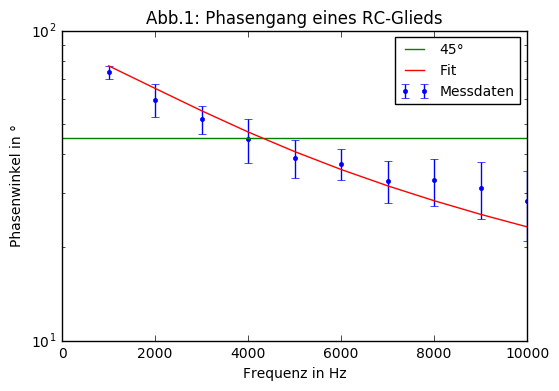

In [4]:
#Aufgabe 3
dt = np.array([204, 83, 48, 31, 21.6, 17.2, 13, 11.4, 9.6, 7.8])*10**(-6)
ddt = np.array([10, 10, 5, 5, 3, 2, 2, 2, 2, 2])*10**(-6)
f = np.array([1,2,3,4,5,6,7,8,9,10])*1000

R = 1000
dR= 0.05*R # Fehler aus Skript
C = 47*10**(-9)
dC= 0.1*C # Fehler aus Skript

phi = f*dt*360
dphi = phi*ddt/dt

#Plot
plt.title('Abb.1: Phasengang eines RC-Glieds')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Phasenwinkel in °')
plt.yscale('log')
plt.errorbar(f, phi, yerr=dphi, linestyle='None', fmt='.', label='Messdaten')
plt.plot(np.array([0,10000]),np.array([45,45]), label='45°')
plt.savefig('figures/Aufgabe3_Phasengang.pdf',format='pdf')

#Fit2
def fit_func2(f, r, c):
    return np.arctan(1/(2*np.pi*f*r*c))*180/np.pi
popt, pcov=curve_fit(fit_func2,f,phi,p0=[1000,47*10**(-9)],sigma=dphi)

plt.plot(f,fit_func2(f,*popt), label='Fit')
#plt.plot(f,np.arctan(1/(2*np.pi*f*R*C))*180/np.pi, label='Fit')
plt.legend(loc='best',prop={'size':10}) #Legendengroesse
plt.savefig('figures/Aufgabe3_Phasengang.pdf',format='pdf')

print("R=",popt[0],",Standardfehler=",np.sqrt(pcov[0][0]))
print("C=",popt[1],",Standardfehler=",np.sqrt(pcov[1][1]))

chi2_= np.sum((fit_func2(f,*popt)-phi)**2/dphi**2)
dof = len(phi)-2 #degrees of freedom
chi2_red=chi2_/dof
print("chi2_red=",chi2_red)
fgr_fit = 1/(2*np.pi*popt[0]*popt[1]*np.tan(45* np.pi/180))
dfgr_fit = 200
print("Grenzfrequenz aus fit", fgr_fit, "+-", dfgr_fit)
#Daraus ergibt sich eine Grenzfrequenz von f=4296.98z+-200

fgr_theo = 1/(1000*47*10**(-9))/(2*np.pi)
dfgr_theo= fgr_theo*np.sqrt((dC/C)**2+(dR/R)**2)
print("Theoretische Grenzfrequenz",fgr_theo)
print("Fehler der theoretischen Grenzfrequenz",dfgr_theo)

abwgrenzfrequenz = (fgr_fit-fgr_theo)/(np.sqrt(dfgr_theo**2+dfgr_fit**2))
print("Abweichung zwischen theoretischer und gefitteter Grenzfrequenz", abwgrenzfrequenz, "$\sigma $")
#gemessen:
print("MESSWERT:Hochpass: 3400+-200")
print("MESSWERT:Tiefpass: 3000+-200")
print("Phasengang", phi)
print("Fehler Phasengang", dphi)

In [5]:
#Aufgabe 4

C  = 47*10**(-9)
dC = 0.1*C
R  = np.array([1000, 220, 47])
dR = 0.05*R
wr = 2*np.pi*np.array([3.66, 3.45, 3.42])*1000
dwr= 2*np.pi*100#theoretischer Fehler
dw = 2*np.pi*np.array([3.09, 1.09, 0.6])*1000
#dw ohne Fehler!
Ue = np.array([0.97, 0.97, 0.97])
Ua = np.array([0.91, 0.71, 0.31])

L1 = 1/((wr)**2*C) 
dL1= L1*np.sqrt((dC/C)**2+(2*dwr/wr)**2)
print('L1: ',L1)
print('dL1:',dL1)

def fit_func(l1,l):
    return l
popt, pcov=curve_fit(fit_func,L1,L1,p0=[0.03],sigma=dL1)
print("Mittelwert von L1=",popt[0],", Standardfehler=",np.sqrt(pcov[0][0]))
L=popt[0]
dL=np.sqrt(pcov[0][0])

rprv = dw * L1
drprv= rprv*(dL1/L1)
Rv   =rprv-R
dRv  = np.sqrt(dR**2+(dw*dL1)**2)
print("Verlustwiderstand über dw")
print('Rv: ',Rv)
print('dRv:',dRv)
print("Verlustwiderstand über die Spannung")
rv = R*(Ue/Ua-1)
drv= rv*dR/R
print('Rv: ',rv)
print('dRv:',drv)

delta=(Rv-rv)/(np.sqrt(dRv**2+drv**2))
print("Abweichungen zwischen den beiden Methoden",delta)

L1:  [ 0.0402328   0.04527977  0.04607764]
dL1: [ 0.00458478  0.00523381  0.00533782]
Mittelwert von L1= 0.0435000733964 , Standardfehler= 0.00189580059952
Verlustwiderstand über dw
Rv:  [-218.87851687   90.10629444  126.70859674]
dRv: [ 102.09530621   37.49450644   20.25986932]
Verlustwiderstand über die Spannung
Rv:  [  65.93406593   80.56338028  100.06451613]
dRv: [ 3.2967033   4.02816901  5.00322581]
Abweichungen zwischen den beiden Methoden [-2.7882204   0.25305879  1.27676029]


In [6]:
#Aufgabe 5

C = 47*10**(-9)
dC= 0.1*C
R = 47
dR= 0.05*R

A = np.array([2.81, 1.88, 1.22, 0.84, 0.56])
dA= 0.05
T = 0.28 * 10**(-3)
dT= 0.01 * 10**(-3)

wr = 2*np.pi/T
dwr = wr*dT/T
L1 = 1/((wr)**2*C) 
dL1 = L1*np.sqrt((2*dwr/wr)**2+(dC/C)**2)
print('L1:', L1)
print('dL1', dL1)

Lambda = np.log(np.array([A[0]/A[1], A[1]/A[2], A[2]/A[3], A[3]/A[4]]))
dLambda= dA*np.array([np.sqrt((1/A[0])**2+(1/A[1])**2), np.sqrt((1/A[1])**2+(1/A[2])**2), np.sqrt((1/A[2])**2+(1/A[3])**2), np.sqrt((1/A[3])**2+(1/A[4])**2)])
print('Lambda:', Lambda)
print('dLambda:', dLambda)

delta = Lambda/T
ddelta= delta*np.sqrt((dLambda/Lambda)**2+(dT/T)**2)

Rges = delta*2*L1
dRges = Rges*np.sqrt((ddelta/delta)**2+(dL1/L1)**2)

Rv = Rges-R
dRv= np.sqrt(dRges**2+dR**2)

print('Rv:', Rv)
print('dRv:', dRv)

def fit_func(r1,r):
    return r
popt, pcov=curve_fit(fit_func,Rv,Rv,p0=[80],sigma=dRv)
print("Mittelwert von Rv=",popt[0],", Standardfehler=",np.sqrt(pcov[0][0]))

L1: 0.042253089348719595
dL1 0.00519249740164
Lambda: [ 0.40191271  0.43242092  0.37320425  0.40546511]
dLambda: [ 0.03199915  0.04885683  0.07226853  0.10730807]
Rv: [ 74.30038213  83.50799778  65.63594534  75.37252458]
dRv: [ 18.43277847  22.40304527  26.24939497  36.05074968]
Mittelwert von Rv= 75.2220451641 , Standardfehler= 3.56384083197


In [7]:
#Aufgabe 6

C    = 47*10**(-9)
dC   = 0.1*C
R    = 220 
Rv   = 81 #Hier Wert aus Aufgabe 4 eintragen !
Rges = R+Rv
dRges= 0.05*Rges
L1   = 0.044 #Hier Wert aus Aufgabe 4 eintragen !
dL1  = 0.002 #Hier Wert aus Aufgabe 4 eintragen !

delta = (Rges)/(2*L1)
wr_theo = 1/np.sqrt(L1*C)
dwr_theo= wr_theo*np.sqrt((dL1/(2*L1))**2+(dC/(2*C))**2)
wc_theo = np.sqrt(wr_theo**2-2*delta**2)
dwc_theo= 1/wc_theo*np.sqrt(((Rges**2/L1**3-1/(C*L1**2))*dL1)**2+(dC/(2*C**2*L1))**2+(Rges*dRges/(2*L**2))**2)
wl_theo = np.sqrt(wr_theo**2+2*delta**2)
dwl_theo= 1/wl_theo*np.sqrt(((Rges**2/L1**3+1/(C*L1**2))*dL1)**2+(dC/(2*C**2*L1))**2+(Rges*dRges/(2*L**2))**2)

wr_ex = 2*np.pi*3.6*1000#Hier gemessene Werte der Frequenz f eintragen
dwr_ex= wr_ex*0.2/3.6#Hier gemessene Werte der Frequenz f eintragen
wc_ex = 2*np.pi*4.04*1000#Hier gemessene Werte der Frequenz f eintragen
dwc_ex=wc_ex*0.1/4.04#Hier gemessene Werte der Frequenz f eintragen
wl_ex = 2*np.pi*4.35*1000#Hier gemessene Werte der Frequenz f eintragen
dwl_ex=wl_ex*0.1/4.35#Hier gemessene Werte der Frequenz f eintragen

print('Theoretisch:', wr_theo, wc_theo, wl_theo)
print('Fehler:     ', dwr_theo, dwc_theo, dwl_theo)
print('Experimentell:',wr_ex, wc_ex, wl_ex)
print('Fehler:   ', dwr_ex, dwc_ex, dwl_ex)
abwrfreq_r = np.abs(wr_theo-wr_ex)/np.sqrt(dwr_theo**2+dwr_ex**2)
abwrfreq_c = np.abs(wc_theo-wc_ex)/np.sqrt(dwc_theo**2+dwc_ex**2)
abwrfreq_l = np.abs(wl_theo-wl_ex)/np.sqrt(dwl_theo**2+dwl_ex**2)
print("Abweichung exp-theor für R", abwrfreq_r)
print("Abweichung exp-theor für c", abwrfreq_c)
print("Abweichung exp-theor für l", abwrfreq_l)
      

Theoretisch: 21989.9748567 21451.3397158 22515.7281204
Fehler:      1207.75398705 1459.45032372 1517.32715046
Experimentell: 22619.46710584651 25384.068641005528 27331.856086231197
Fehler:    1256.6370614359173 628.3185307179587 628.3185307179587
Abweichung exp-theor für R 0.361168895377
Abweichung exp-theor für c 2.47504039471
Abweichung exp-theor für l 2.93259602846


In [8]:
#Aufgabe 7
C = 47*10**(-9)
R = 1000
Rv= 66 #Aus AUfgabe 4 eintragen
Rges = R+Rv
dRges= 0.05*Rges
L1   = 0.044 #Aus Aufgabe 4 eintragen
dL1  = 0.002

w_theo  = 1/np.sqrt(L1*C)
dw_theo = w_theo*np.sqrt((dL1/(2*L1))**2+(dC/(2*C))**2)
w_ex  = 2*np.pi*3.6*1000
dw_ex = w_ex*0.1/3.6

print('Theoretisch:', w_theo, 'Fehler:',dw_theo)
print('Experimentell:',w_ex, 'Fehler:',dw_ex)
print("Abweichung", np.abs(w_theo-w_ex)/np.sqrt(dw_theo**2+dw_ex**2))

Theoretisch: 21989.9748567 Fehler: 1207.75398705
Experimentell: 22619.46710584651 Fehler: 628.3185307179587
Abweichung 0.462380485255


In [10]:
#Aufgabe 8

#hauptsächlich diskutieren
#siehe Auswertung